In [102]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


## aygıt kontrolü

In [103]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5284800697442650748, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8649298564190174266
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11041170427274314393
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11146722048
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14572702720953350731
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [104]:
ls

'My Drive'/


In [105]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential,load_model
from keras.layers import MaxPooling2D,Dense,Conv2D,Dropout,Flatten
from keras import backend as K
import matplotlib.pyplot as plt

In [106]:
(x_train,y_train),(x_tesst,y_test)=mnist.load_data()

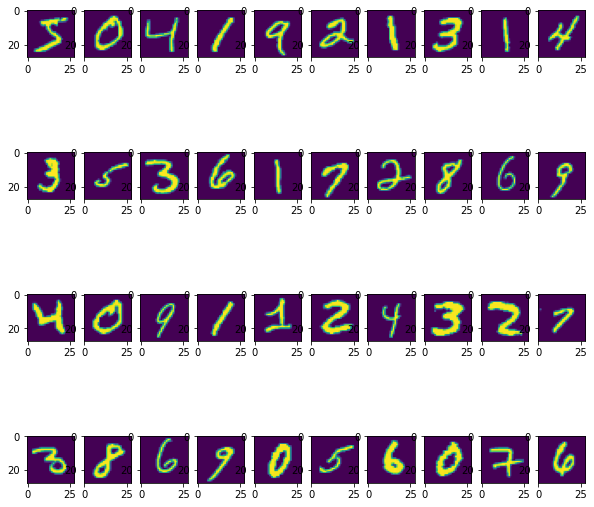

In [107]:
plt.figure(figsize=(10,10))

for i in range(40):
  plt.subplot(4,10,i+1)
  plt.imshow(x_train[i])
plt.show()

In [108]:
K.image_data_format="channels_last"

In [109]:
if K.image_data_format=="channels_last":
  x_train=x_train.reshape(x_train.shape[0],28,28,1) 
  x_tesst=x_tesst.reshape(x_tesst.shape[0],28,28,1) 
  input_shape=(28,28,1)
if K.image_data_format=="channels_first":
  x_train=x_train.reshape(x_train.shape[0],1,28,28) 
  x_tesst=x_tesst.reshape(x_tesst.shape[0],1,28,28) 
  input_shape=(28,28,1)




In [110]:
x_train.shape


(60000, 28, 28, 1)

In [111]:
K.image_data_format

'channels_last'

In [112]:
x_tesst.shape

(10000, 28, 28, 1)

## model ve katmanları olusturma

In [113]:
model=Sequential()

In [114]:
model.add(Conv2D(32,kernel_size=(3,3),
                 activation="relu",
                 input_shape=input_shape))

model.add(Conv2D(64,(3,3),
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation="relu",))

model.add(Dropout(0.5))

model.add(Dense(10,activation="softmax"))

In [115]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)              

In [116]:
model.compile(optimizer=keras.optimizers.Adadelta(),
              metrics=["accuracy"],
              loss=keras.losses.categorical_crossentropy)

In [117]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [118]:
x_train.shape

(60000, 28, 28, 1)

In [119]:
x_tesst.shape

(10000, 28, 28, 1)

In [120]:
y_test.shape

(10000, 10)

In [121]:
model.fit(x_train,y_train,batch_size=32, 
          epochs=5,
          verbose=1,
          validation_data=(x_tesst,y_test)) 

Epoch 1/5
1875/1875 [==============================] - 14s 8ms/step - loss: 18.0055 - accuracy: 0.2079 - val_loss: 1.7596 - val_accuracy: 0.5605
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 4.7369 - accuracy: 0.3371 - val_loss: 1.2844 - val_accuracy: 0.5720
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 2.5761 - accuracy: 0.3700 - val_loss: 1.4536 - val_accuracy: 0.5423
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 2.0776 - accuracy: 0.3920 - val_loss: 1.4437 - val_accuracy: 0.5552
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 1.8941 - accuracy: 0.4198 - val_loss: 1.3529 - val_accuracy: 0.5956


In [122]:
ls


'My Drive'/


In [123]:
model.save("My Drive/mnist_model.h5")

In [124]:
score=model.evaluate(x_tesst,y_test,verbose=0)
print("loss: ",score[0])
print("accuracy: ",score[1])

loss:  1.3529314994812012
accuracy:  0.5956000089645386


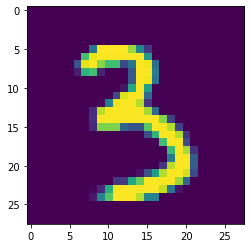

In [125]:
test_image=x_tesst[32]
plt.imshow(test_image.reshape(28,28))

In [126]:
test_data=x_tesst[32].reshape(1,28,28,1)
proba=model.predict_proba(test_data)
preds=model.predict_classes(test_data)
preds.argmax(axis=-1)
print(preds,proba)

[3] [[0.08685331 0.0493873  0.1900823  0.29882947 0.16241369 0.07266479
  0.03042636 0.05758435 0.03002915 0.02172932]]
